# Исследование рынка заведений общественного питания Москвы

<h3> Бриф <a class="tocSkip"></h2>

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

<h3> Цель исследования <a class="tocSkip"></h2>

Подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

<h3> Описание данных <a class="tocSkip"></h2>

Датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

<h3> План работы <a class="tocSkip"></h2>

1. [Обзор датасета](#1)
2. [Предобработка данных](#2)
3. [Анализ данных](#3)
4. [Детализируем исследование: открытие кофейни](#4)
5. [Общий вывод и рекомендации](#5)

### Обзор данных <a id='1'></a>

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from folium import Map, Choropleth

In [3]:
places.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [4]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Промежуточный вывод**

* Всего представлено 8406 заведений
* Во многих столбцах присутствуют пропуски (`'hours'`, `'price'`, `'avg_bill'`, `'middle_avg_bill'`, `'middle_coffee_cup'` `'seats'`)

### Предобработка данных <a id='2'></a>

In [5]:
# проверка на полные явные дубликаты
places.duplicated().sum()

0

**изучим причины формирования пропусков в столбцах и пути работы с ними**

**hours**

в этом стобце пропуски невозможно заполнить, если же их удалять то мы потеряем около 6% данных.

**price**

в этом стобце также не представляется возможным корректное заполнение данных и пропусков слишком много (из 8406 заполнено лишь 3315, т.е. потеряем почти 40% данных)

**avg_bill**

все также, (3816 строк из 8406)

**middle_avg_bill**

значения столбца формируются из **avg_bill**, начинающихся с подстроки «Средний счёт», что является не единственным значением в **avg_bill** и объясняет происходение пропусков. т.е. данные из **avg_bill** распределяются в данный стобец на основании категории заведения, пропуски неизбежны.

**middle_coffee_cup**

столбец формируется только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино». т.е. в данным столбец попадают значения, только если в **avg_bill** цена представлена определенным образом, также как и в **middle_avg_bill**.

**seats**

многие кофейни и заведения в москве основаны на формате 'to go', возможно этим могут объяснятся пропуски в стобце

**Промежуточный вывод**

Замена пропусков или же их удаление будут некорректным решением работы с пропусками - это может привести к искажению результатов.

**создание дополнительных столбцов**

In [7]:
# создадим столбец 'street' с названием улиц
places['street'] = places['address'].str.split(', ').str[1]
places.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street  
0                NaN      0    NaN            улица Дыбенко  
1                NaN      0    4.0            улица Дыбенко  
2                NaN      0   45.0       Клязьминская улица  
3              170.0      0    NaN  улица Маршала Федоренко  
4                NaN      1  148.0      Правобережная улица

In [8]:
places['is_24/7'] = places['hours'].apply(lambda x: x == 'ежедневно, круглосуточно')
display(places.head())
print('Количество заведений, работающих круглосуточно:', places[places['is_24/7'] == True]['name'].count())

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street  is_24/7  
0                NaN      0    NaN            улица Дыбенко    False  
1                NaN      0    4.0            улица Дыбенко    False  
2                NaN      0   45.0       Клязьминская улица    False  
3              170.0      0    NaN  улица Маршала Федоренко    False  
4                NaN      1  148.0      Правобережная улица    False

Количество заведений, работающих круглосуточно: 730


**Промежуточные выводы**

1. Дубликатов не было выявлено
2. Принято решение оставить пропуски, чтобы не исказить результаты анализа данных и финальные выводы
3. Созданы столбцы `'street'` и `'is_24/7'`

### Анализ данных <a id='3'></a>

**категории заведений**

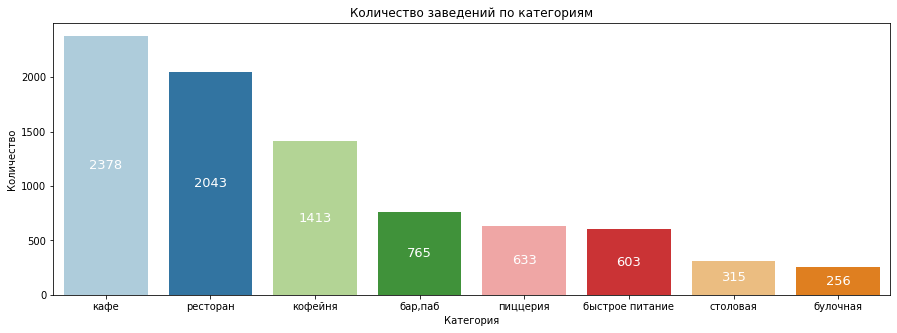

In [9]:
places_categ = places.groupby('category').agg({'name': 'count'}).sort_values('name', ascending=False).reset_index()

plt.figure(figsize=(15,5))

ax = sns.barplot(data=places_categ, y='name', x='category', palette='Paired')

# добавление подписей значений к столбцам
    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height / 2
    ax.annotate(f'{int(places_categ.iloc[i]["name"])}', (x, y), ha='center', va='center', fontsize=13, color='white')

ax.set_title('Количество заведений по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Количество');

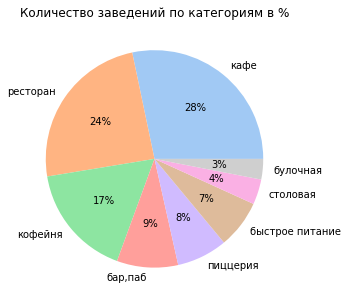

In [10]:
plt.figure(figsize=(13,5))

plt.pie(places_categ['name'], labels=places_categ['category'], colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.title('Количество заведений по категориям в %');

Распределение заведений по категориям устроено следующим образом:
1. Больше всего представлено кафе (28% от всех объектом общественного питания)
2. Рестораны составляют 24%, кофейни 17%
3. Меньшне всего в Москве представлено столовых (4%) и булочных (3%)

**посадочные места**

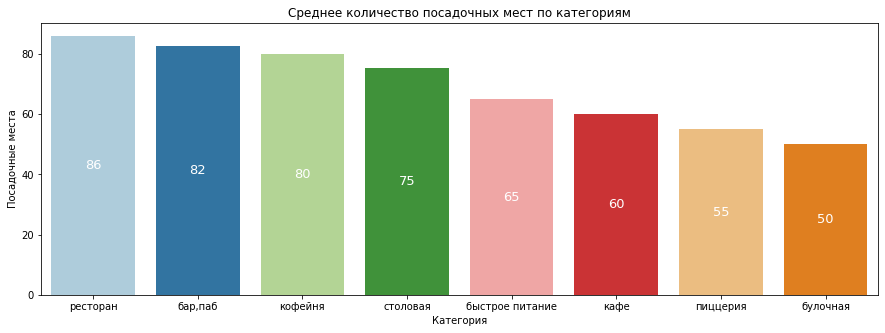

In [11]:
places_seats = places.groupby('category').agg({'seats': 'median'}).sort_values('seats', ascending=False).reset_index()

plt.figure(figsize=(15,5))

ax = sns.barplot(data=places_seats, y='seats', x='category', palette='Paired')
    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height / 2
    ax.annotate(f'{int(places_seats.iloc[i]["seats"])}', (x, y), ha='center', va='center', fontsize=13, color='white')

ax.set_title('Среднее количество посадочных мест по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Посадочные места');

Посмотрим на распределение нормальных значений количества посадочных мест

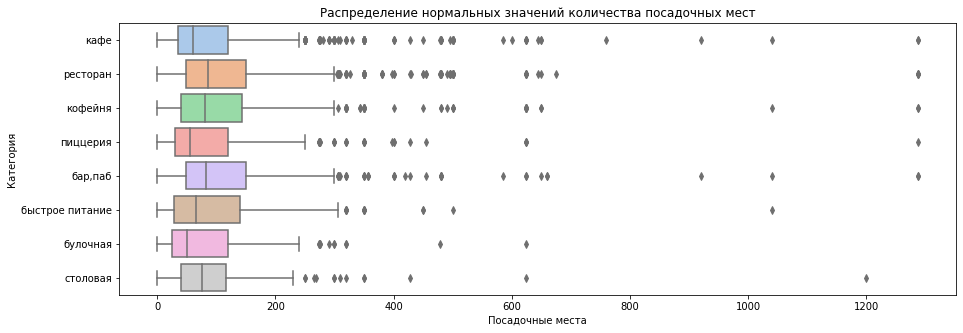

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=places, x='seats', y='category', palette='pastel')

plt.title('Распределение нормальных значений количества посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Категория');

На графике видны явные выбросы. Ограничим значения, поставим верхнюю границу в 500 посадочных мест.

In [13]:
places[places['seats'] > 500]['name'].count()

56

Всего 56 заведений с аномалиями (<1%), удалим их из датафрейма

In [14]:
places = places[~((places['seats'] > 500) & places['seats'].notna())]
len(places)

8350

Посмотрим на медианное значение посадочных мест после фильтрации

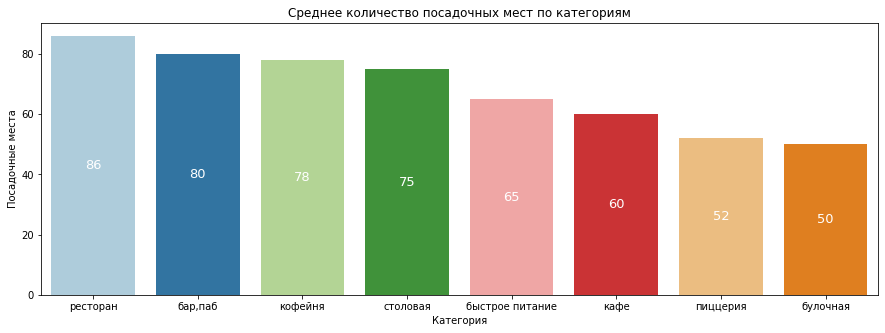

In [15]:
places_seats = places.groupby('category').agg({'seats': 'median'}).sort_values('seats', ascending=False).reset_index()

plt.figure(figsize=(15,5))

ax = sns.barplot(data=places_seats, y='seats', x='category', palette='Paired')
    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height / 2
    ax.annotate(f'{int(places_seats.iloc[i]["seats"])}', (x, y), ha='center', va='center', fontsize=13, color='white')

ax.set_title('Среднее количество посадочных мест по категориям')
ax.set_xlabel('Категория')
ax.set_ylabel('Посадочные места');

Больше всего посадочных мест в ресторанах (в среднем 86), далее в барах/пабах (80). Меньше же всего в пиццериях (52) и булочных (50)

**сетевые и несетевые заведения**

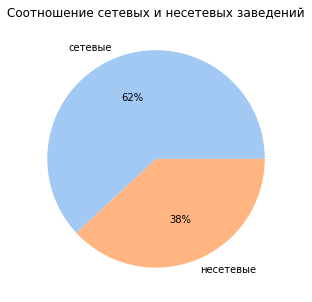

In [16]:
places_chain = places.groupby('chain').agg({'name': 'count'}).reset_index()

places_chain['labels'] = places_chain['chain'].apply(lambda x: 'сетевые' if x == 0 else 'несетевые')

plt.figure(figsize=(13,5))

plt.pie(places_chain['name'], labels=places_chain['labels'], colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.title('Соотношение сетевых и несетевых заведений');

Сетевые заведения составляют 3/5 от всех объектов в Москве

**Распределение категорий заведений по сетевым/несетевым**

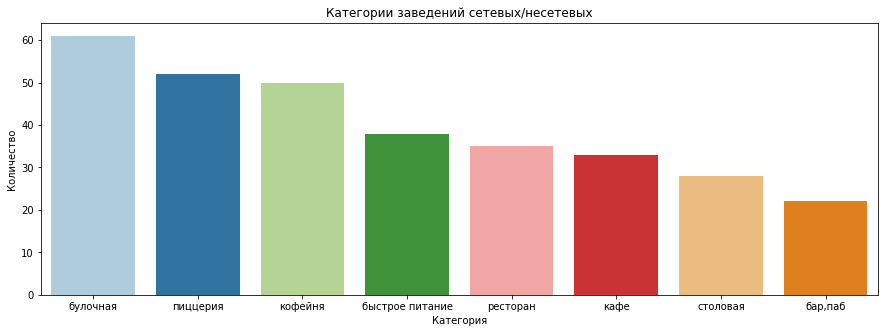

In [17]:
places_categ_chain = (places.query('chain == 1').groupby('category').agg({'name': 'count'}).reset_index())

places_categ_full = places_categ_chain.merge(places_categ, on='category', how='left')
places_categ_full.columns = ['category', 'chains', 'count']
places_categ_full['share'] = round(places_categ_full['chains'] / places_categ_full['count'] * 100)

plt.figure(figsize=(15,5))

sns.barplot(data=places_categ_full.sort_values('share', ascending=False), y='share', x='category', palette='Paired')

plt.title('Категории заведений сетевых/несетевых')
plt.xlabel('Категория')
plt.ylabel('Количество');

Из графика видно, что по большей части сетевыми заведения являются булочные. Чуть меньше (около 50%) пиццерия и кофейня. Меньше всего сетевых заведений баров/пабов.

**Топ-15 популярных сетей в Москве**

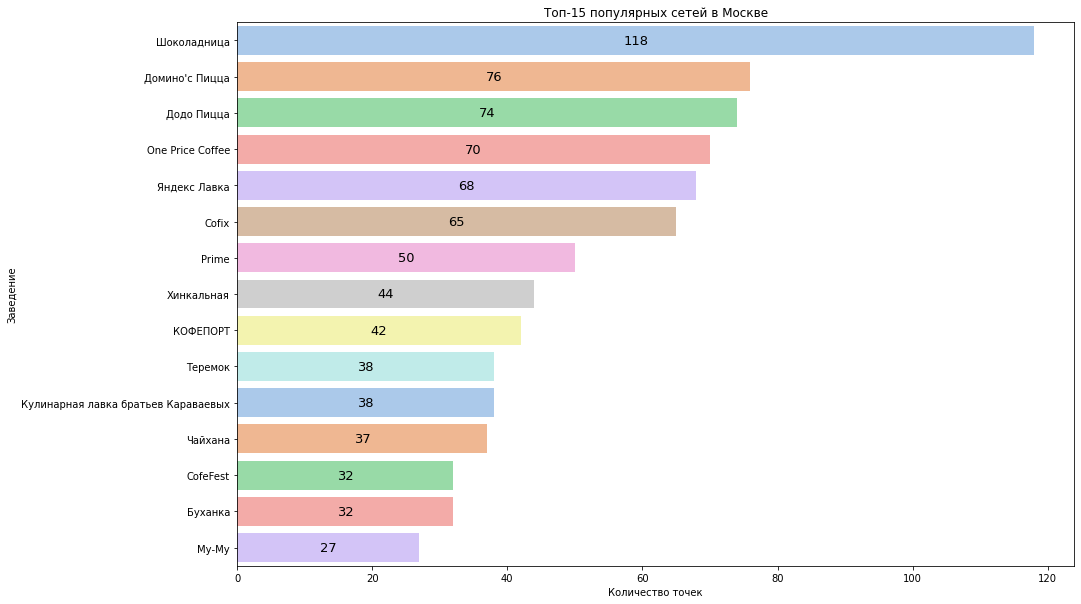

In [18]:
top_chain = (places[places['chain'] == 1]
                    .groupby('name').agg({'rating': 'count', 'category': 'max'})
                    .sort_values('rating', ascending=False).reset_index().head(15))
top_chain = top_chain.rename(columns={'rating': 'count'})


plt.figure(figsize=(15,10))

ax = sns.barplot(data=top_chain, y='name', x='count', palette='pastel')
    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height / 2
    ax.annotate(f'{int(top_chain.iloc[i]["count"])}', (x, y), ha='center', va='center', fontsize=13, color='black')

ax.set_title('Топ-15 популярных сетей в Москве')
ax.set_xlabel('Количество точек')
ax.set_ylabel('Заведение');

На графике проиллюстрированны 15 самых популярных заведений, знакомых любому москвичу. Некоторые заведения можно сгруппировать по категориям:

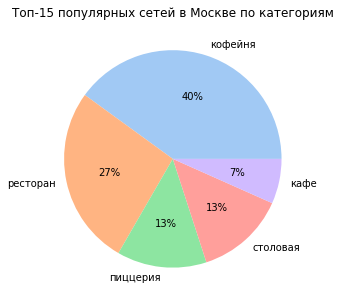

In [19]:
categ_grouped_top15 = (top_chain.groupby('category').agg({'name': 'count'})
                       .sort_values('name', ascending=False)
                       .reset_index()
                      )

plt.figure(figsize=(13,5))

plt.pie(categ_grouped_top15['name'],
        labels=categ_grouped_top15['category'], 
        colors=sns.color_palette('pastel'),
        autopct='%1.0f%%')

plt.title('Топ-15 популярных сетей в Москве по категориям');

Большинство заведений из топ-15 относятся к кофейням (40%), 27% составляют рестораны, к пиццериям и столовым относятся по 2 заведения (по 13%) и только лишь одно кафе в списке. 

Также многие заведения объединяет несколько пунктов:
* посредством сетевого фактора они являются достаточно доступными для любой группы людей
* большинство из них размещено в местах высокой проходимости
* также большинство заведений осуществляют доставку, в том числе через Яндекс Лавку

Можно заметить, что среди сетевых объектов, пользующихся популярностью, нет заведений быстрого питания, баров/пабов и булочных.

**расположение заведений по административным районам москвы**

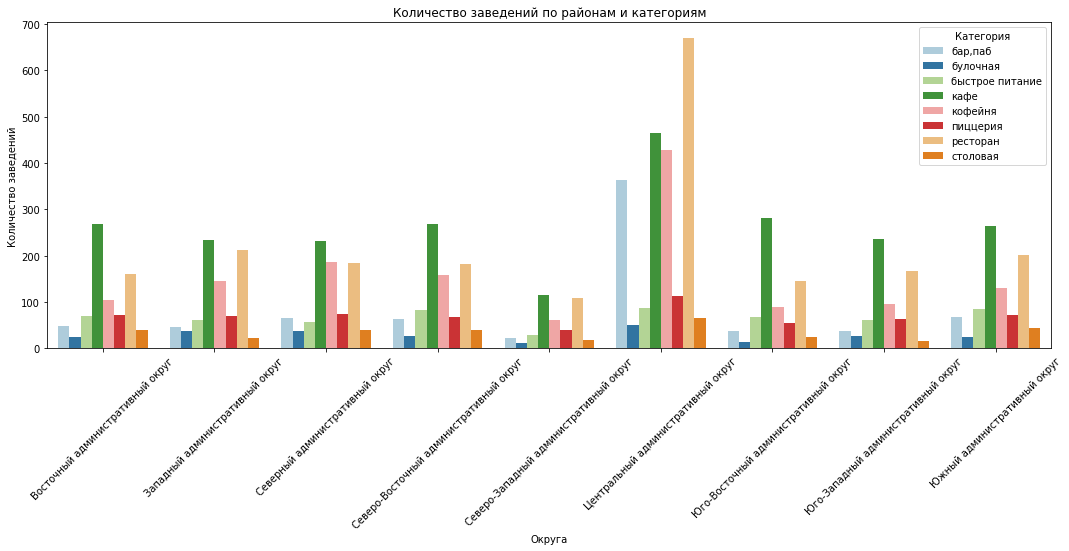

In [20]:
places_districts = places.groupby(['district', 'category']).agg({'name': 'count'}).reset_index()

plt.figure(figsize=(18, 6))

sns.barplot(data=places_districts, x='district', y='name', hue='category', palette='Paired')
plt.title('Количество заведений по районам и категориям')
plt.xlabel('Округа')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.legend(title='Категория');

Всего в датасете представлено 9 административных райнов Москвы. Из распределения заведений по районам можно заметить, что больше всего объектов находится в границах Центрального округа, меньше в Северо-Западном.

**распределение средних рейтингов по категориям заведений**

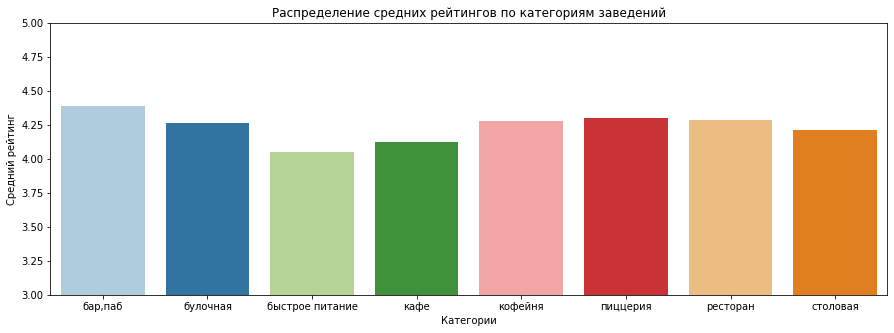

In [21]:
places_rating = places.groupby('category').agg({'rating': 'mean'}).reset_index()

plt.figure(figsize=(15,5))

sns.barplot(data=places_rating, x='category', y='rating', palette='Paired')
plt.title('Распределение средних рейтингов по категориям заведений')
plt.xlabel('Категории')
plt.ylabel('Средний рейтинг')
plt.ylim(3, 5);

Усредненные рейтинги по категориям не кардинально различаются (значения колеблются от 4.2 до 4.5), но в среднем рейтинг у баров/пабов на несколько процентных пунктов выше, чем у остальных категорий. "Самый низкий рейтинг" у заведений быстрого питания и кафе. 

**фоновая диаграмма**

In [22]:
# подключаем модуль для работы с JSON-форматом
import json

# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
moscow_map = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=places,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.5,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(moscow_map)

# выводим карту
moscow_map

В среднем самые высокие рейтинги заведений в Северо-Восточном округе, ниже среднего в Центральном и Южном, самые низкие по всем округам в Восточном.

Теперь отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium

In [23]:
# импортируем карту и маркер
from folium import Marker
# импортируем кластер
from folium.plugins import MarkerCluster

# создаём карту Москвы
moscow_map_clusters = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles="Cartodb Positron")
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(moscow_map_clusters)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
places.apply(create_clusters, axis=1)

# выводим карту
moscow_map_clusters

**топ-15 улиц по количеству заведений**

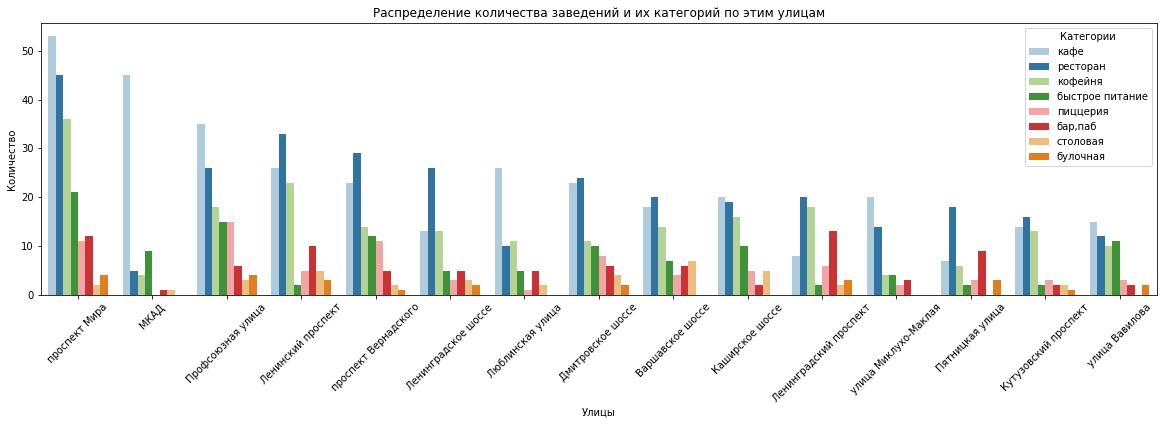

In [24]:
top_street = places.groupby('street').agg({'name': 'count'}).sort_values('name', ascending=False).reset_index().head(15)
top_15_streets = top_street.street
top_street_categor = (places.query('street in @top_15_streets')
                      .groupby(['street', 'category']).agg({'name': 'count'})
                      .sort_values('name', ascending=False).reset_index())

plt.figure(figsize=(20,5))

sns.barplot(data=top_street_categor, x='street', y='name', palette='Paired', hue='category')
plt.title('Распределение количества заведений и их категорий по этим улицам')
plt.xlabel('Улицы')
plt.ylabel('Количество')
plt.legend(title='Категории')
plt.xticks(rotation=45);

Больше всего заведений находятся на проспекте мира, меньше на улице Вавилова. По графику видно, что на большинстве улиц количество кафе и ресторанов выше, чем остальных категорий.

**улицы, на которых находится только один объект общепита**

Количество улиц, на которых находится только один объект общепита: 458


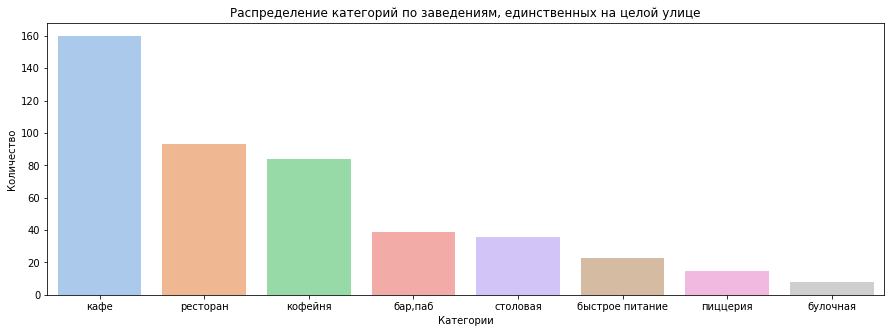

In [25]:
street_with_one_place = places.groupby('street').agg({'name': 'count'}).query('name == 1').reset_index()
one_place = street_with_one_place.street

only_one_categ = places.query('street in @one_place')

only_one_categ = only_one_categ.groupby('category').agg({'name': 'count'}).sort_values('name', ascending=False).reset_index()

plt.figure(figsize=(15,5))

sns.barplot(data=only_one_categ, x='category', y='name', palette='pastel')
plt.title('Распределение категорий по заведениям, единственных на целой улице')
plt.xlabel('Категории')
plt.ylabel('Количество');

print('Количество улиц, на которых находится только один объект общепита:', only_one_categ['name'].sum())

Здесь распределение повторяет распределение количества заведений по категориям по всему датафрейму.

Общее количество улиц, на которых находится только один объект общепита, состовляет 458.

**анализ среднего чека**

In [26]:
middle_avg_bill_by_district = places.groupby('district').agg({'middle_avg_bill': 'median'}).reset_index()

moscow_bill = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

Choropleth(
    geo_data=state_geo,
    data=middle_avg_bill_by_district,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Медианный чек по районам',
).add_to(moscow_bill)

moscow_bill

middle_avg_bill_by_district

district  middle_avg_bill
0         Восточный административный округ            550.0
1          Западный административный округ           1000.0
2          Северный административный округ            650.0
3  Северо-Восточный административный округ            500.0
4   Северо-Западный административный округ            700.0
5       Центральный административный округ           1000.0
6     Юго-Восточный административный округ            450.0
7      Юго-Западный административный округ            600.0
8             Южный административный округ            500.0

По картограмме видно:
1. Самый высокий средний чек в двух округах - Центральном и Западном
2. Средний в Северном, Северо-Западном, Юго-Западном и Востоном
3. Самый низкий: Северо-Восточный, Юго-Восточный и Южный.

Можно сказать, в 7 из 8 округов удаленность от центра влияет на величину среднего чека, если в центре он равняется примерно 1000 рублей, то в других округах 450-500, т.е. в 2 раза меньше.

**Промежуточные выводы**

1. **Больше всего** в Москве **кафе** (28%), на втором месте **рестораны** (24%), далее **кофейни**. **Меньше** всего **столовых** и **булочных**.
2. Посадочные места распределены следующим образом: рестораны - 86 мест, пабы/бары - 80, кофейни - 76. Т.е. данные заведения ориентированы именно на продолжительную посадку людей, также нужно учитывать подходящие площади под данные заведения.
3. В Москве **больше сетевых заведений (62%)**, нежели несетевых. Можно рассмотреть покупку франшизы или же лицензии.
4. Распределение категорий между сетевыми и несетевыми заведениями:
    * Преимущественно сетевыми являются - бары/пабы, заведения быстрого питания, кафе, рестораны и столовые
    * Больше несетевых заведений в категориях булочных, кофеен и пиццерий
5. В число **самых популярных сетевых объектов** входят **кофейни** (40%), 27% составляют **рестораны**, к пиццериям и столовым относятся по 2 заведения (по 13%) и только лишь одно кафе в списке.
6. Среди сетевых **объектов, пользующихся популярностью**, **нет** заведений **быстрого питания**, **баров/пабов** и **булочных**.
7. **Больше всего заведений** находится в границах **Центрального округа**, меньше в Северо-Западном.
8. Анализ среднего чека:
    * Самый высокий средний чек (1000 рублей) в двух округах - Центральном и Западном
    * Средний (500-600 рублей) в Северном, Северо-Западном, Юго-Западном и Восточном
    * Самый низкий (450 рублей): Северо-Восточный, Юго-Восточный и Южный.

### Открытие кофейни <a id='4'></a>

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно.Осуществима ли мечта клиентов?

In [27]:
coffee_places = places[places['category'] == 'кофейня']
len(coffee_places)

1401

Всего в датасете представлено 1401 кофейня

Посмотрим на распределение кофеен по районам Москвы

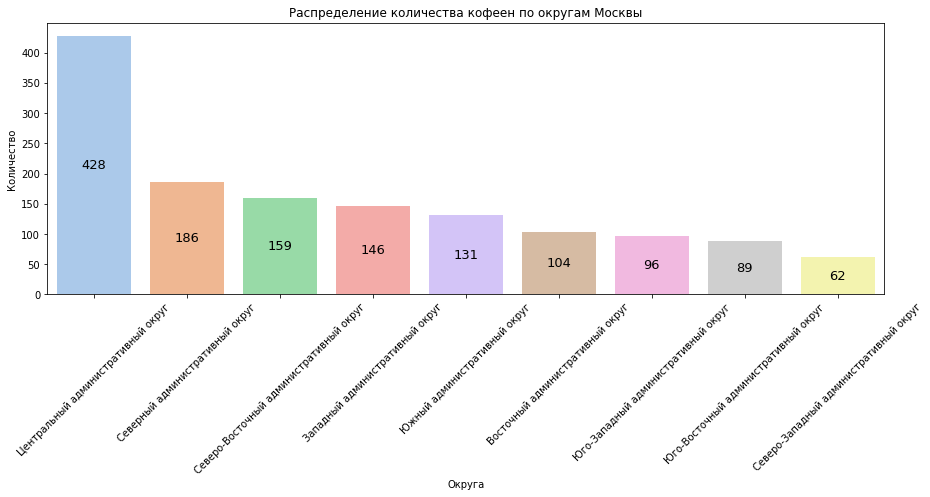

In [28]:
coffee_district = coffee_places.groupby('district').agg({'name': 'count'}).sort_values('name', ascending=False).reset_index()

plt.figure(figsize=(15,5))

ax = sns.barplot(data=coffee_district, y='name', x='district', palette='pastel')

for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width / 2, p.get_y() + height / 2
    ax.annotate(f'{int(coffee_district.iloc[i]["name"])}', (x, y), ha='center', va='center', fontsize=13, color='black')

plt.title('Распределение количества кофеен по округам Москвы')
plt.xlabel('Округа')
plt.ylabel('Количество')
plt.xticks(rotation=45);

Больше всего кофеен находится в Центральном округе, далее в Северном и Северо-Восточном, меньше же всего в Северо-Западном

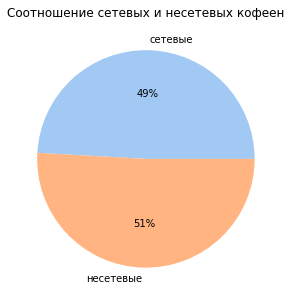

In [29]:
coffee_chain = coffee_places.groupby('chain').agg({'name': 'count'}).reset_index()

coffee_chain['labels'] = coffee_chain['chain'].apply(lambda x: 'сетевые' if x == 0 else 'несетевые')

plt.figure(figsize=(13,5))

plt.pie(coffee_chain['name'], labels=places_chain['labels'], colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.title('Соотношение сетевых и несетевых кофеен');

Соотношение сетевых и несетевых кофеен почти одинаковое

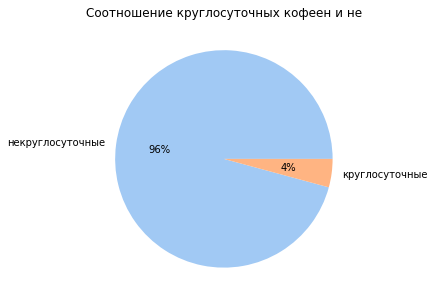

In [30]:
coffee_24_7 = coffee_places.groupby('is_24/7').agg({'name': 'count'}).reset_index()

coffee_24_7['labels'] = coffee_24_7['is_24/7'].apply(lambda x: 'круглосуточные' if x == True else 'некруглосуточные')

plt.figure(figsize=(13,5))

plt.pie(coffee_24_7['name'],
        labels=coffee_24_7['labels'],
        colors=sns.color_palette('pastel'),
        autopct='%1.0f%%')

plt.title('Соотношение круглосуточных кофеен и не');

Почти все кофейни некруглосуточные, только 4% работают целый день.

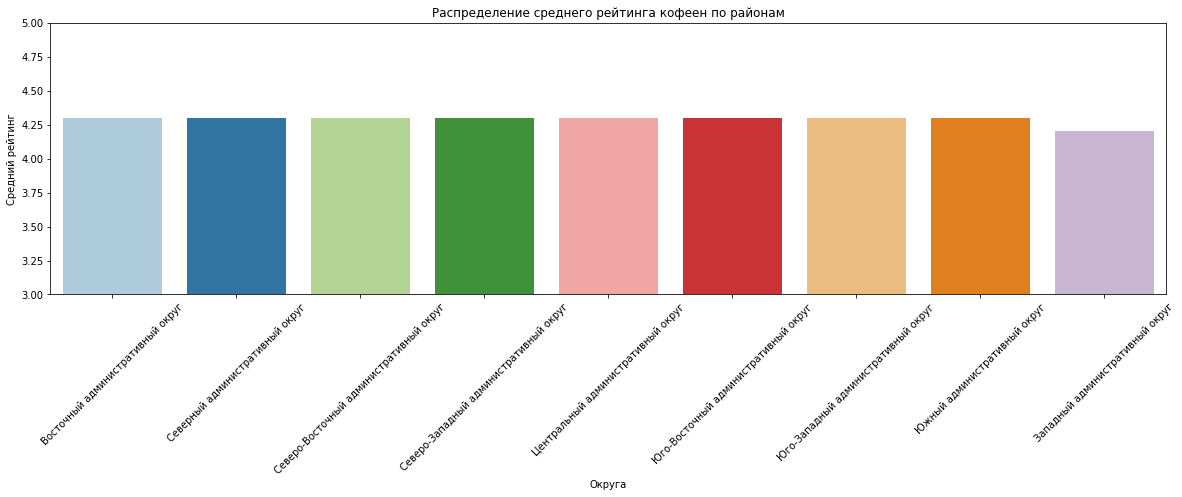

In [31]:
coffee_rating = coffee_places.groupby('district').agg({'rating': 'median'}).sort_values('rating', ascending=False).reset_index()

plt.figure(figsize=(20,5))

sns.barplot(data=coffee_rating, x='district', y='rating', palette='Paired')

plt.title('Распределение среднего рейтинга кофеен по районам')
plt.xlabel('Округа')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.ylim(3,5);

В целом по всем округам средний рентинг кофейни составляет около 4.3, но выделяется Западный административный округ - в нем рейтинг "проседает" по сравнению со всеми и составляет примерно 4.2

Посмотрим, на какую стоимость чашки капучино стоит ориентироваться при открытии

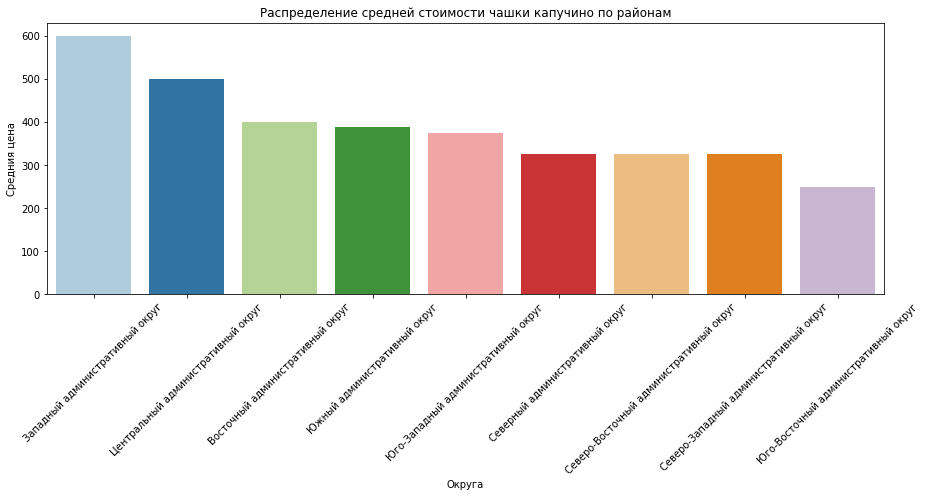

In [32]:
cup_of_coffee = (coffee_places
                 .groupby('district').agg({'middle_avg_bill': 'median'})
                 .sort_values('middle_avg_bill', ascending=False)
                 .reset_index()
                )

plt.figure(figsize=(15,5))

sns.barplot(data=cup_of_coffee, y='middle_avg_bill', x='district', palette='Paired')
plt.title('Распределение средней стоимости чашки капучино по районам')
plt.xlabel('Округа')
plt.ylabel('Средния цена')
plt.xticks(rotation=45);

При формировании стоимости чашки капучино нужно ориентироваться на район, в котором планируется открытие кофейни. Соответственно самая высокая цена в Западном округе (почти 600 рублей), чуть ниже в Центральном (около 500 рублей), самая же низкая в Юго-Восточном (250 рублей).

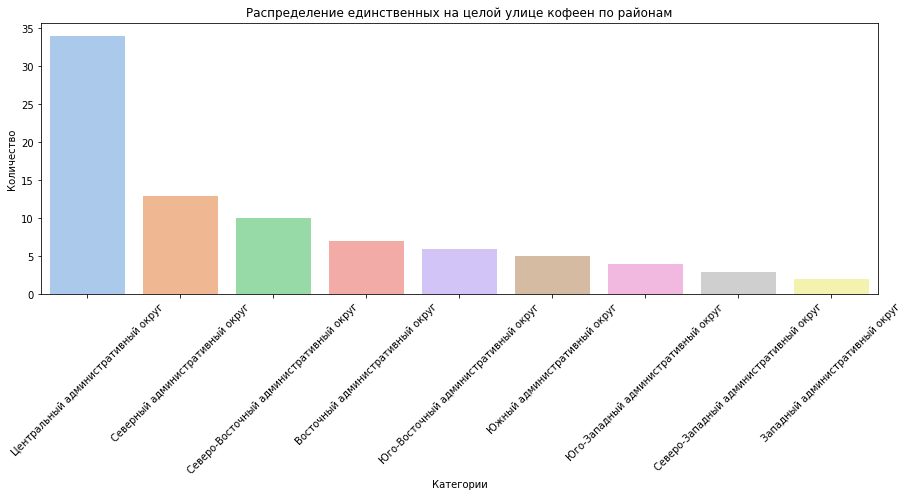

In [33]:
only_one_coffee = (coffee_places.query('street in @one_place')
                   .groupby('district').agg({'name': 'count'})
                   .sort_values('name', ascending=False)
                   .reset_index()
                  )

plt.figure(figsize=(15,5))

sns.barplot(data=only_one_coffee, x='district', y='name', palette='pastel')
plt.title('Распределение единственных на целой улице кофеен по районам')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.xticks(rotation=45);

С одной стороны может показаться, что в Центральном округе сфера кофеен перегрета, их больше здесь, чем в любом другом районе, но при этом на одной улице может быть только одно заведение-кофейня. т.е. есть потенциал и места для открытия новых заведений.

Меньше же всего такое происходит в Западном округе, видимо площадь под кофейни там почти заполнена.

**Промежуточный вывод**

1. Всего в датасете представлено **1401 кофеен**
2. **Больше всего** заведений находится **в Центральном округе**, меньше всего в Северо-Западном
3. Соотношение сетевых и несетевых кофеен 50/50
4. В Москве только 4% кофеен, работающих круглосуточно
5. В целом в 8/9 округах (кроме Западного) средний рентинг кофейни составляет около 4.3
6. Кофейни по цене за капучино можно разделить следующим образом:
    * самая высокая цена в Западном округе (почти 600 рублей), чуть ниже в Центральном (около 500 рублей)
    * самая же низкая в Юго-Восточном (250 рублей)
    * в остальных районах цена колеблется между 300-400 рублями
7. В Центральном районе больше всего кофеен, которые являются единственными на улице. Меньше же всего такое происходит в Западном округе, видимо площадь под кофейни там почти заполнена.

### Общий вывод <a id='5'></a>

Датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года был обработан и проанализирован.

В ходе работы были проведены следующие мероприятия и сделаны выводы:

**Предобработка данных**

* Проверка наличия пропущенных значений и дубликатов в датафреймах и их обработка
* Создание дополнительных столбцов с детализированной информацией о времени работы заведений и улицах, на которых они находятся

**Анализ данных**

Были проведены исследования данных по следующим характеристикам заведений:

* категория заведения
* количество посадочных мест
* сетевой признак
* расположение по административным районам Москвы, улицам
* средний рейтинг
* средний чек

Были также проанализированы топ-15 сетевых заведений, постреены распределения категорий по сетевому признаку и фоновые диаграммы с кластеризацией.

**Детализирование исследования: открытие кофейни**

Более конкретный анализ возможного открытия кофейни был проведен, учитвыя вышеперечисленные характеристики.

****

**Рекомендации**

Учитывая заявления о том, что инвесторы не боятся высокой конкуренции в данной сфере, можно порекомендовать открыть заведение в Центральном административном округе. Несмотря на большое скопление кофеен здесь, возможности и пространства для открытия имеются. Также можно рассматривать как открытие сетевой кофейни, например Cofix, OnePrice и т.д., так и несетевой, со своей концепцией. Для создания уникального предложения можно рассмотреть открытие круглосуточной кофейни в центре, т.к. их количество достаточно мало.

**Презентация исследования**: <https://drive.google.com/file/d/1mmX7l5-n2zY1JtTQIIj0TLXGFA7xPqDH/view?usp=sharing> 